<a href="https://colab.research.google.com/github/danoneeee/uni_works/blob/master/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%9B%D0%90%D0%910_%D0%9A%D1%80%D1%8B%D0%BB%D0%BE%D0%B2_%D0%94%D0%B0%D0%BD_%D0%A0%D0%A3%D0%90%D0%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Постановка задачи

На первой практике вам предстоит поработать с реальными данными об истории экспертиз рабочих программ дисциплин в ИТМО.

**Задача:** сделать краткое исследование данных и построить 3 графика двумя способами. Первый способ - самостоятельно. Второй - с активной помощью ChatGPT, Perplexity или [любого другого ИИ](https://theresanaiforthat.com/). Порядок реализации способов значения не имеет. Библиотеки можно использовать любые.

**Цель:** оценить качество помощи ИИ для аналитики. В конце обязательно сделайте текстовый вывод по результатам работы!

## Загрузка данных

Загрузим датасет в колаб, найти его также можно [по ссылке](https://drive.google.com/file/d/1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8/view?usp=share_link), если по какой-то причине у вас не работает gdown.

In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

!gdown 1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8

Downloading...
From: https://drive.google.com/uc?id=1mJoAbyxf7vUU8_bVQvsahdW3HY8uz-V8
To: /content/exp_stats.csv
100% 925k/925k [00:00<00:00, 68.0MB/s]


Посмотрим на данные.

In [ ]:
data = pd.read_csv("/content/exp_stats.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7657 entries, 0 to 7656
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   workprogram_id     7657 non-null   int64 
 1   user_count         7657 non-null   int64 
 2   expertise_status   7657 non-null   object
 3   expertise_counter  7657 non-null   int64 
 4   approval_date_y    7657 non-null   object
 5   title              7657 non-null   object
dtypes: int64(3), object(3)
memory usage: 359.0+ KB


Всего шесть столбцов, все без пропусков:
- `workprogram_id` - айди рабочей программы (РПД)
- `user_count` - сколько человек принимали участие в создании РПД
- `expertise_status` - на каком этапе экспертизы находится РПД (статус экспертизы: AC - одобрена, RE - на доработке, AR - в архиве, EX - на экспертизе, WK - в работе)
- `expertise_counter` - сколько раз РПД проходила экспертизу
- `approval_date` - день, когда РПД признали удовлетворяющей всем требованиям и разрешили ее реализовывать
- `title` - название дисциплины


In [ ]:
data.head()

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
0,2626,4,AC,1,2022-05-06 14:23:17.924 +0200,Философия
1,8461,4,AC,1,2022-04-28 09:01:59.171 +0200,Философия
2,2627,3,AC,5,2021-08-31 20:51:19.142 +0200,Введение в цифровую культуру и программирование
3,2628,4,AC,0,2022-04-28 11:36:30.474 +0200,Проектирование баз данных
4,2631,4,AC,0,2022-04-28 12:06:31.165 +0200,Современные вопросы информатики


## Краткое исследование данных

В данных не слишком много столбцов и уже известно, что нет пустых ячеек. Теперь неплохо было бы погрузиться в них и ответить на 3 небольших вопроса:
1. Какой период охватывают данные в датасете?
2. Есть ли в данных нетипичные значения? Например, неположительные числа в столбце `user_count`. Или даты, которые сильно выбиваются из общего диапазона значений.
3. Есть ли нелогичные значения в данных? Например, статус РПД "в работе", но есть `approval_date`. Или статус "одоберно", но РПД 0 раз проходила экспертизу.



In [ ]:
#1
data['approval_date_y'] = pd.to_datetime(data['approval_date_y'])

min_date = data['approval_date_y'].min()
max_date = data['approval_date_y'].max()

print("ПЕРИОД ОХВАТА: от", min_date, "  до", max_date)


#2
neg_numbers = data[data['user_count'] < 1]
print("НЕПОЛОЖИТЕЛЬНЫЕ:",neg_numbers)

#3
nelog_stat = data[data['expertise_status'] == 'WK']
print(nelog_stat[['workprogram_id','expertise_status', 'approval_date_y']])

nelog_AC = data[(data['expertise_status'] == 'AC') & (data['expertise_counter'] == 0)]
print(nelog_AC[['workprogram_id', 'expertise_status', 'expertise_counter']])



ПЕРИОД ОХВАТА: от 2021-01-01 00:00:00   до 2023-01-01 00:00:00
НЕПОЛОЖИТЕЛЬНЫЕ: Empty DataFrame
Columns: [workprogram_id, user_count, expertise_status, expertise_counter, approval_date_y, title]
Index: []
      workprogram_id expertise_status approval_date_y
2618           10886               WK      2021-01-01
5095           17711               WK      2022-01-01
5093           17709               WK      2022-01-01
5094           17710               WK      2022-01-01
      workprogram_id expertise_status  expertise_counter
2162            6645               AC                  0
2155            6633               AC                  0
2161            6644               AC                  0
2157            6635               AC                  0
3462           13298               AC                  0
...              ...              ...                ...
7651           24946               AC                  0
7650           24945               AC                  0
7655        

Теперь ответьте на более интересные вопросы с использованием визуализаций.

### 1. Как распределяется количество редакторов рабочих программ на всем периоде наблюдений?

array([[<Axes: title={'center': 'user_count'}>]], dtype=object)

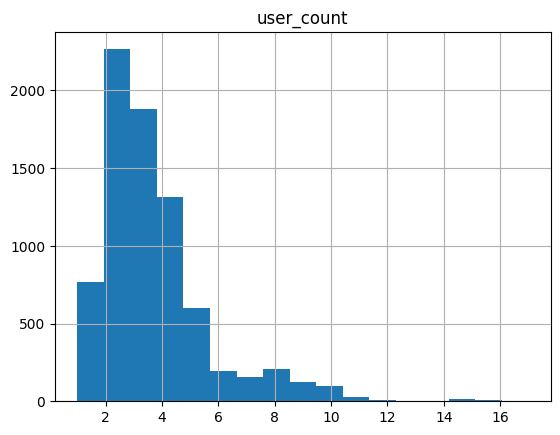

In [ ]:
data.hist(column = 'user_count', bins = 17)

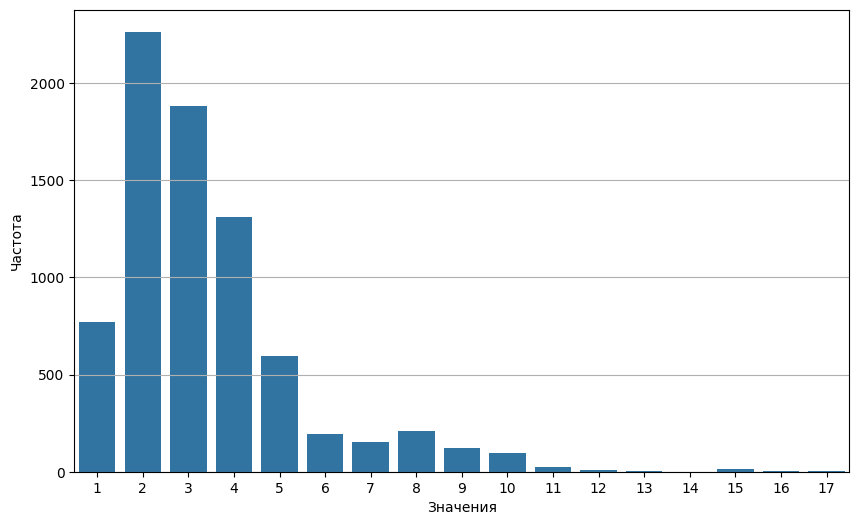

In [ ]:
value_counts = data['user_count'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)

# Добавим подписи и заголовок
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.xticks(rotation=0)
plt.grid(axis='y')

### 2. Как со временем менялось среднее количество экспертиз РПД?

<function matplotlib.pyplot.show(close=None, block=None)>

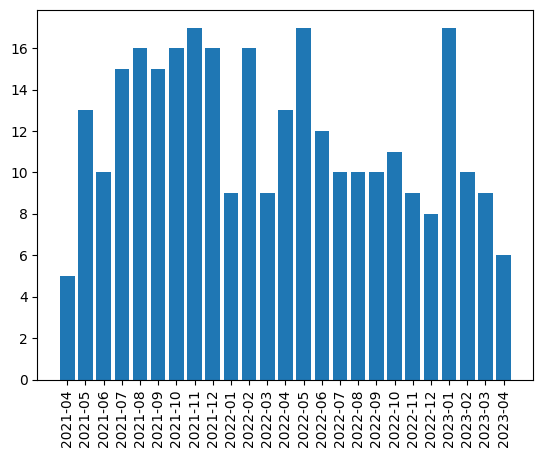

In [ ]:
data['approval_date_y'] = data['approval_date_y'].str.slice(0, 7)
data = data.sort_values(by='approval_date_y', ascending=True)

plt.bar(data['approval_date_y'], data['user_count'])
plt.xticks(rotation=90)

plt.show

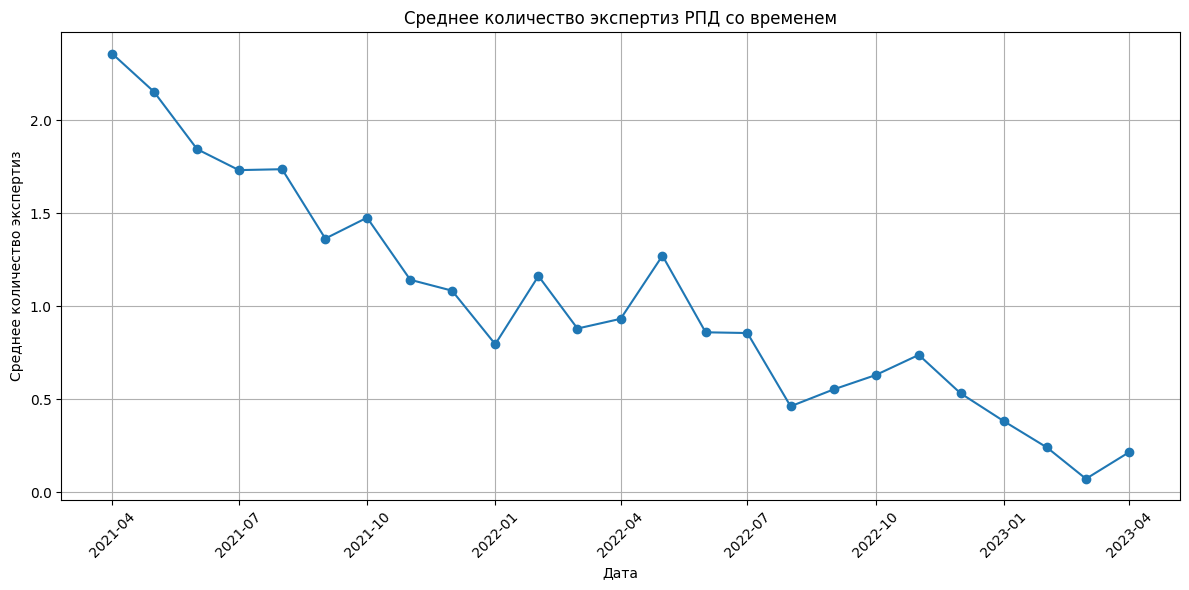

In [ ]:
data['approval_date_y'] = pd.to_datetime(data['approval_date_y'])
# Группируем данные по дате и вычисляем среднее значение expertise_counter
average_expertise_per_date = data.groupby(data['approval_date_y'].dt.to_period('M'))['expertise_counter'].mean()

# Преобразуем индекс обратно в datetime
average_expertise_per_date.index = average_expertise_per_date.index.to_timestamp()

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(average_expertise_per_date.index, average_expertise_per_date.values, marker='o', linestyle='-')
plt.title('Среднее количество экспертиз РПД со временем')
plt.xlabel('Дата')
plt.ylabel('Среднее количество экспертиз')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 3. Есть ли зависимость между датой и присвоением статуса "одобрено" (AC)?

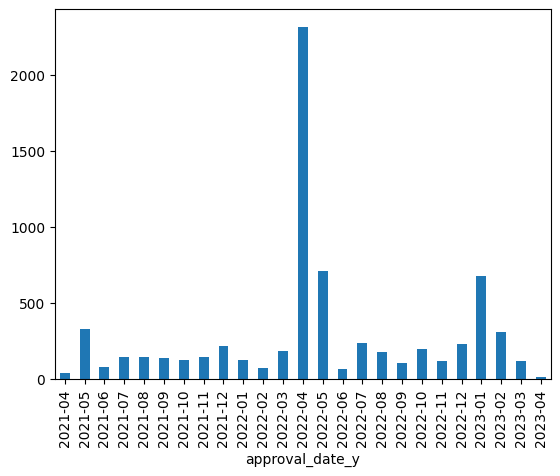

In [ ]:
data['expertise_status']
data['approval_date_y']

data_ac = data[data['expertise_status'] == 'AC']
status_counts = data_ac.groupby('approval_date_y').size()


status_counts.plot(kind='bar')
plt.xticks(rotation=90)

plt.show()

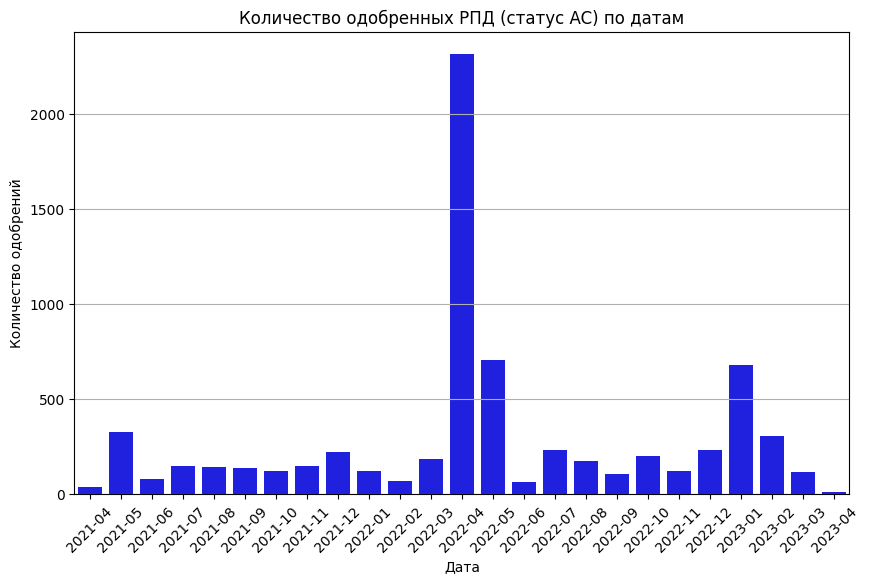

In [ ]:
grouped = data.groupby('approval_date_y')['expertise_status'].apply(lambda x: (x == 'AC').sum()).reset_index()

# Переименовываем столбцы для удобства
grouped.columns = ['approval_date', 'count_AC']

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='approval_date', y='count_AC', data=grouped, color='blue')
plt.title('Количество одобренных РПД (статус AC) по датам')
plt.xlabel('Дата')
plt.ylabel('Количество одобрений')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

### Оцените результаты

In [ ]:
Нейросети могут упростить работу при выполнении базовых задач, но при этом они выдают практически одинаковые решения. В случае необходимости нестандартного решения нейросети не особо полезны